# Actividad: Análisis exploratorio con técnicas de agrupamiento 

In [5]:
#import libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# clustering methods
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
# Metrics for evaluating clustering results
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Distance metrics
from sklearn.metrics import pairwise_distances
#read csv
df = pd.read_csv('Country-data.csv', delimiter=',')
df


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [8]:
#declare x and y
x = df.iloc[:, 1:].values
y = df.iloc[:,0].values


#1 Aplica k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos.

----- K-means -----
Labels:  [2 6 6 2 0 0 6 3 3 0 8 7 2 0 0 3 6 2 2 2 6 6 0 5 0 2 2 2 2 3 2 2 2 0 6 6 2
 2 2 6 2 0 8 7 3 6 6 6 6 7 2 0 6 3 3 0 2 6 3 2 8 6 6 2 2 2 2 0 3 2 6 0 6 3
 8 8 6 3 6 0 2 2 5 2 2 0 0 2 2 7 0 9 6 2 2 0 6 2 7 2 0 2 2 6 6 6 2 2 6 2 3
 8 2 2 1 7 2 0 6 6 2 0 7 4 0 0 2 2 7 2 6 0 2 5 0 7 2 6 7 8 6 6 2 0 3 1 2 2
 6 2 2 2 6 0 6 2 6 5 3 3 0 2 2 0 2 2 2]


/home/alanv/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


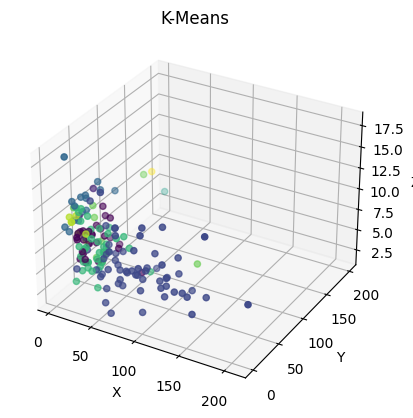

In [13]:
####### Helper funtion for plotting #######
def plot_data(points, labels, title):
    fig = plt.figure()
    if points.shape[1] > 2:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)
    else:
        plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)
    plt.show()

####### K-means #######
print('----- K-means -----')
kmeans = KMeans(n_clusters=10).fit(x)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_
print('Labels: ', clustering_labels)
#print('Centers: ', centers)
plot_data(x, clustering_labels, 'K-Means')


/home/alanv/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/alanv/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/alanv/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/alanv/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

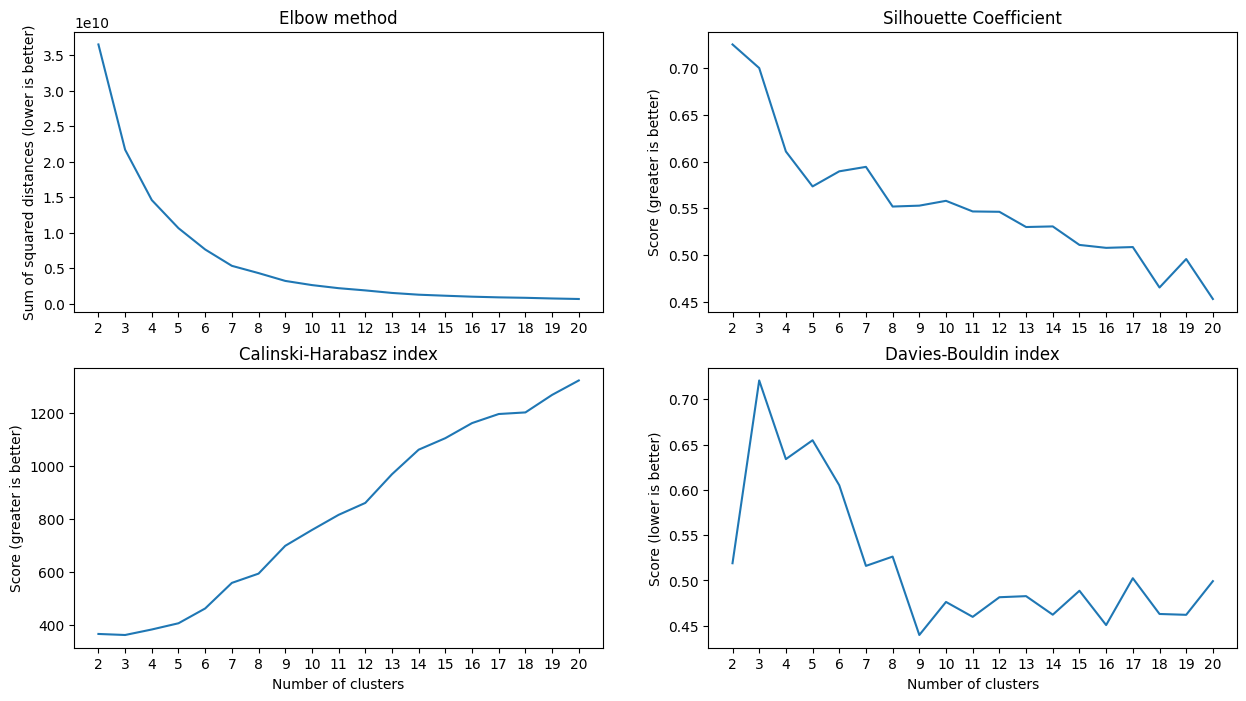

In [10]:
# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []
ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k).fit(x)
    # Evaluate sum of squared distances
    sum_of_squared_distances.append(kmeans.inertia_)
    # Evaluate Silhouette score
    sscore.append(silhouette_score(x, kmeans.labels_))
    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(x, kmeans.labels_))
    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(x, kmeans.labels_))
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks)
axs[0][1].plot(ks, sscore)
axs[0][1].set_ylabel('Score (greater is better)')
axs[0][1].set_title('Silhouette Coefficient')
axs[0][1].set_xticks(ks)
axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')
axs[1][0].set_title('Calinski-Harabasz index')
axs[1][0].set_xticks(ks)
axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')
axs[1][1].set_title('Davies-Bouldin index')
axs[1][1].set_xticks(ks)
plt.show()

#2 Repita lo anterior, pero con otro método de agrupamiento que elijas.

----- Aglomerative clustering -----
Labels:  [2 2 2 2 3 3 2 0 0 2 3 3 2 3 2 0 2 2 2 2 2 2 3 0 2 2 2 2 2 0 2 2 2 3 2 2 2
 2 2 2 2 3 3 3 0 2 2 2 2 3 2 3 2 0 0 2 2 2 0 2 3 2 2 2 2 2 2 3 0 2 2 2 2 0
 3 0 2 0 2 3 2 2 0 2 2 3 2 2 2 3 3 1 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 0
 3 2 2 1 3 2 2 2 2 2 3 3 1 2 3 2 2 3 2 2 3 2 0 3 3 2 2 3 3 2 2 2 2 0 1 2 2
 2 2 2 2 2 3 2 2 2 0 0 0 3 2 2 3 2 2 2]


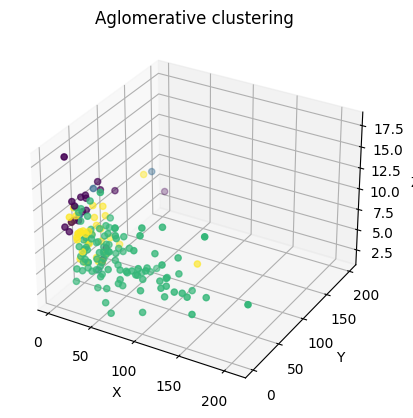

In [17]:
####### Aglomerative clustering #######
print('----- Aglomerative clustering -----')
agl = AgglomerativeClustering(n_clusters=4).fit(x)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(x, clustering_labels, 'Aglomerative clustering')

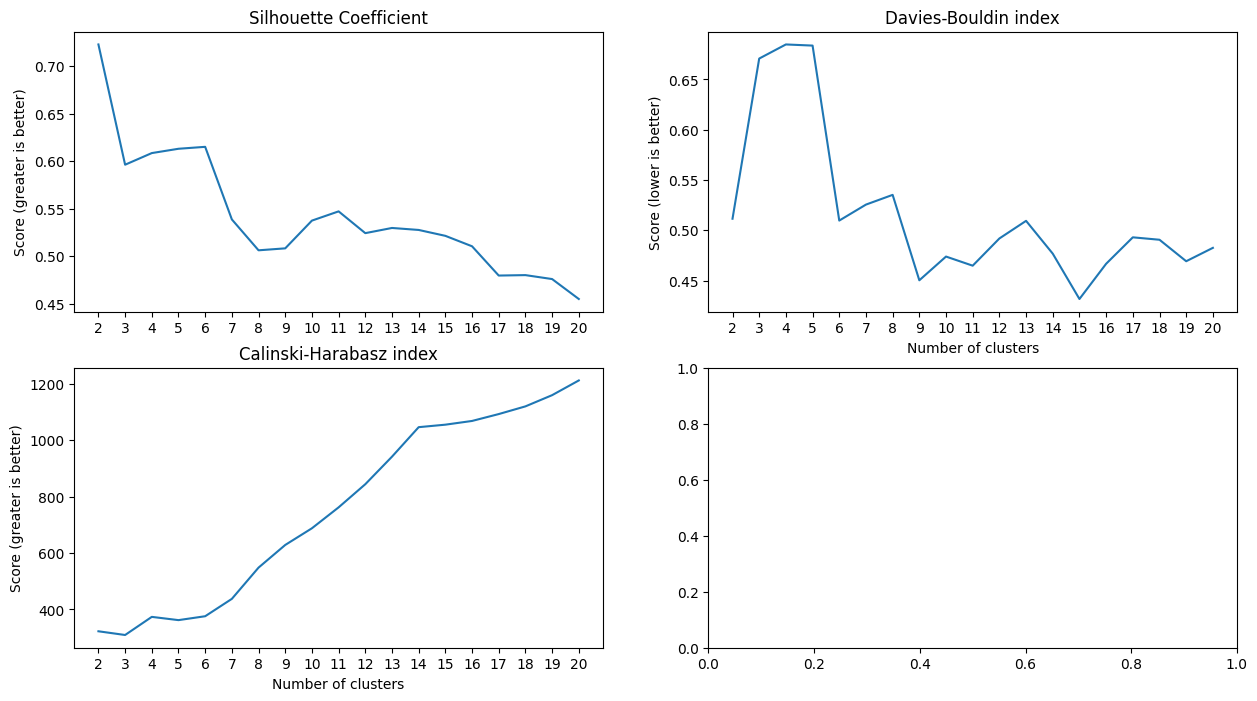

In [21]:
# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []
ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    agl = AgglomerativeClustering(n_clusters=k).fit(x)
    # Evaluate Silhouette score
    sscore.append(silhouette_score(x, agl.labels_))
    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(x,agl.labels_))
    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(x, agl.labels_))
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

axs[0][0].plot(ks, sscore)
axs[0][0].set_ylabel('Score (greater is better)')
axs[0][0].set_title('Silhouette Coefficient')
axs[0][0].set_xticks(ks)
axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')
axs[1][0].set_title('Calinski-Harabasz index')
axs[1][0].set_xticks(ks)
axs[0][1].plot(ks, dbscore)
axs[0][1].set_xlabel('Number of clusters')
axs[0][1].set_ylabel('Score (lower is better)')
axs[0][1].set_title('Davies-Bouldin index')
axs[0][1].set_xticks(ks)
plt.show()

3. Investiga qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio. Algunos ejemplos de librerías son: Minosom, sklearn-som
